In [ ]:
!pip install xgboost
!pip install tensorflow
!pip install lightgbm

In [ ]:
# Import Necessary Libraries
import pandas as pd # Imports the pandas library for data manipulation, aliased as 'pd'
import numpy as np # Imports the numpy library for numerical computations, aliased as 'np'
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler,  PolynomialFeatures # Imports specific preprocessing tools from scikit-learn
from sklearn.decomposition import PCA # Imports Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif # Imports feature selection tools
from sklearn.impute import SimpleImputer # Imports the SimpleImputer class for handling missing values
from scipy.stats import chi2_contingency, f_oneway # Imports statistical tests
from scipy.stats import pearsonr, zscore, skew # Imports the Pearson correlation function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from scipy.stats import skew
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
df = pd.read_csv('AHHH.csv', encoding='latin-1') # Reads the CSV file into a pandas DataFrame

In [ ]:
print(df)

      ï»¿User_id                                 Title Name  Language(Binary)  \
0             16                                  The Birds                13   
1             21                                     Marnie                 3   
2             21                                     Prince                49   
3             25                                      Elaan                13   
4             16                                 Earthquake                 3   
...          ...                                        ...               ...   
4443          32                                    Chabuca                13   
4444          32                                City Hunter                13   
4445          32  Hack Your Health: The Secrets of Your Gut                13   
4446          32                             Khel Khel Mein                13   
4447          32     Nelma Kodama: The Queen of Dirty Money                13   

      Released  Age Rating 

In [ ]:
df = df.rename(columns={"ï»¿User_id": "User_id"})

In [ ]:
print(df)

      User_id                                 Title Name  Language(Binary)  \
0          16                                  The Birds                13   
1          21                                     Marnie                 3   
2          21                                     Prince                49   
3          25                                      Elaan                13   
4          16                                 Earthquake                 3   
...       ...                                        ...               ...   
4443       32                                    Chabuca                13   
4444       32                                City Hunter                13   
4445       32  Hack Your Health: The Secrets of Your Gut                13   
4446       32                             Khel Khel Mein                13   
4447       32     Nelma Kodama: The Queen of Dirty Money                13   

      Released  Age Rating  IMDb  
0         2020           6  

Feature Engineering

In [ ]:
if 'Released' in df.columns:
    df['Movie Age'] = 2025 - df['Released']

In [ ]:
df["Age_Rating_Interaction"] = df["Movie Age"] * df["IMDb"]

1. Train-Test Split

In [ ]:
# Assuming 'IMDb' is your target variable:
# Replace problematic column names with actual column names from your DataFrame
# Print the columns in your DataFrame to verify the correct names:
print(df.columns)

# Update drop to use the correct column names

# Get a list of columns to keep
columns_to_keep = [col for col in df.columns if col not in ['IMDb', 'Title Name', 'User_id']]

# Select only the columns to keep
X = df[columns_to_keep]

y = df['IMDb']

# Check if X is empty and handle it appropriately
if X.empty:
    raise ValueError("The DataFrame X is empty after dropping columns. Please check your column names.")

# Impute missing values using the mean of each column BEFORE converting to numeric
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) # keep the columns

# Convert all columns in X to numeric, errors='coerce' will replace non-numeric values with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

#The imputer step is removed from here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split


Index(['User_id', 'Title Name', 'Language(Binary)', 'Released', 'Age Rating',
       'IMDb', 'Movie Age', 'Age_Rating_Interaction'],
      dtype='object')


Linear Regression(no hypertuning needed)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Random Forest Regressor(hypertuning parameters)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,      # Reduce trees from default 200+
    max_depth=5,          # Limit depth
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

XGBoost Regressor(hypertuning parameters)

In [ ]:
xgb = XGBRegressor(
    n_estimators=50,       # Reduce tree count
    max_depth=4,            # Limit tree depth
    learning_rate=0.01,     # Reduce learning rate
    min_child_weight=3,     # Prevent small splits
    subsample=0.8,          # Only use 80% of the data per tree
    colsample_bytree=0.8,   # Use 80% of features per tree
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

Neural Network(hypertuning parameters)

In [ ]:
nn = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # Fewer neurons
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)
nn.fit(X_train, y_train)
nn_preds = nn.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)

LightGBM(hypertuning parameter)

In [ ]:
lgb = LGBMRegressor(
    objective="regression",
    learning_rate=0.05,
    max_depth=6,  # Reduce tree complexity
    num_leaves=31,  # Fewer leaf nodes
    min_gain_to_split=0.01,  # Avoid useless splits
    min_data_in_leaf=10,  # Prevent overfitting
    n_estimators=500,
    verbose=-1  # Suppress warnings
)

lgb.fit(X_train, y_train) # Fit using the new model name

LGBMRegressor(learning_rate=0.05, max_depth=6, min_data_in_leaf=10,
              min_gain_to_split=0.01, n_estimators=500, objective='regression',
              verbose=-1)

Results after feature engineering and hypertuning

In [ ]:
lr_pred = lr_model.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
nn_preds = nn.predict(X_test).flatten()
lgbm_pred = lgb.predict(X_test)

In [ ]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return f"{name} -> MSE: {mse:.4f}, R²: {r2:.4f}"

In [ ]:
print(evaluate_model("Linear Regression", y_test, lr_pred))
print(evaluate_model("Random Forest", y_test, rf_preds))
print(evaluate_model("XGBoost", y_test, xgb_preds))
print(evaluate_model("Neural Network", y_test, nn_preds))
print(evaluate_model("Light GBM", y_test, lgbm_pred))

Linear Regression -> MSE: 1.2589, R²: 0.7818
Random Forest -> MSE: 0.2624, R²: 0.9545
XGBoost -> MSE: 2.9162, R²: 0.4946
Neural Network -> MSE: 1.4909, R²: 0.7416
Light GBM -> MSE: 0.0004, R²: 0.9999


Cross Validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ✅ Function to perform cross-validation
def cross_validate_model(model, X, y):
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')  # Convert negative MSE
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # R² score directly
    return np.mean(mse_scores), np.mean(r2_scores)

# ✅ Apply cross-validation to models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.01, min_child_weight=3, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.001, learning_rate='adaptive', max_iter=500, random_state=42),
    "Light GBM": LGBMRegressor(objective="regression", learning_rate=0.05, max_depth=6, num_leaves=31, min_gain_to_split=0.01, min_data_in_leaf=10, n_estimators=500, verbose=-1)
}

# ✅ Use X, y instead of X_train, y_train for proper cross-validation
print("===== Cross-Validation Results =====")
for name, model in models.items():
    mse, r2 = cross_validate_model(model, X, y)
    print(f"{name} -> MSE: {mse:.4f}, R²: {r2:.4f}")

===== Cross-Validation Results =====
Linear Regression -> MSE: 1.3292, R²: 0.7713
Random Forest -> MSE: 0.3261, R²: 0.9438
XGBoost -> MSE: 2.9815, R²: 0.4869
Neural Network -> MSE: 0.8011, R²: 0.8623
Light GBM -> MSE: 0.0010, R²: 0.9998


#Phase 4

Step 1

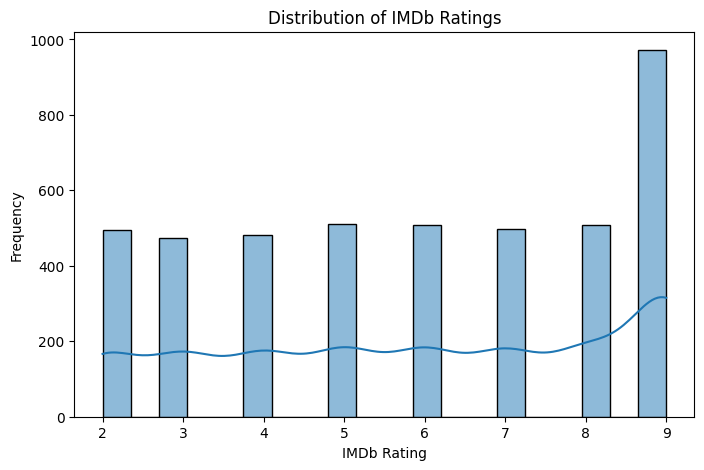

In [ ]:
#Histogram of IMDb ratings
plt.figure(figsize=(8,5))
sns.histplot(df['IMDb'], bins = 20, kde = True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.show()

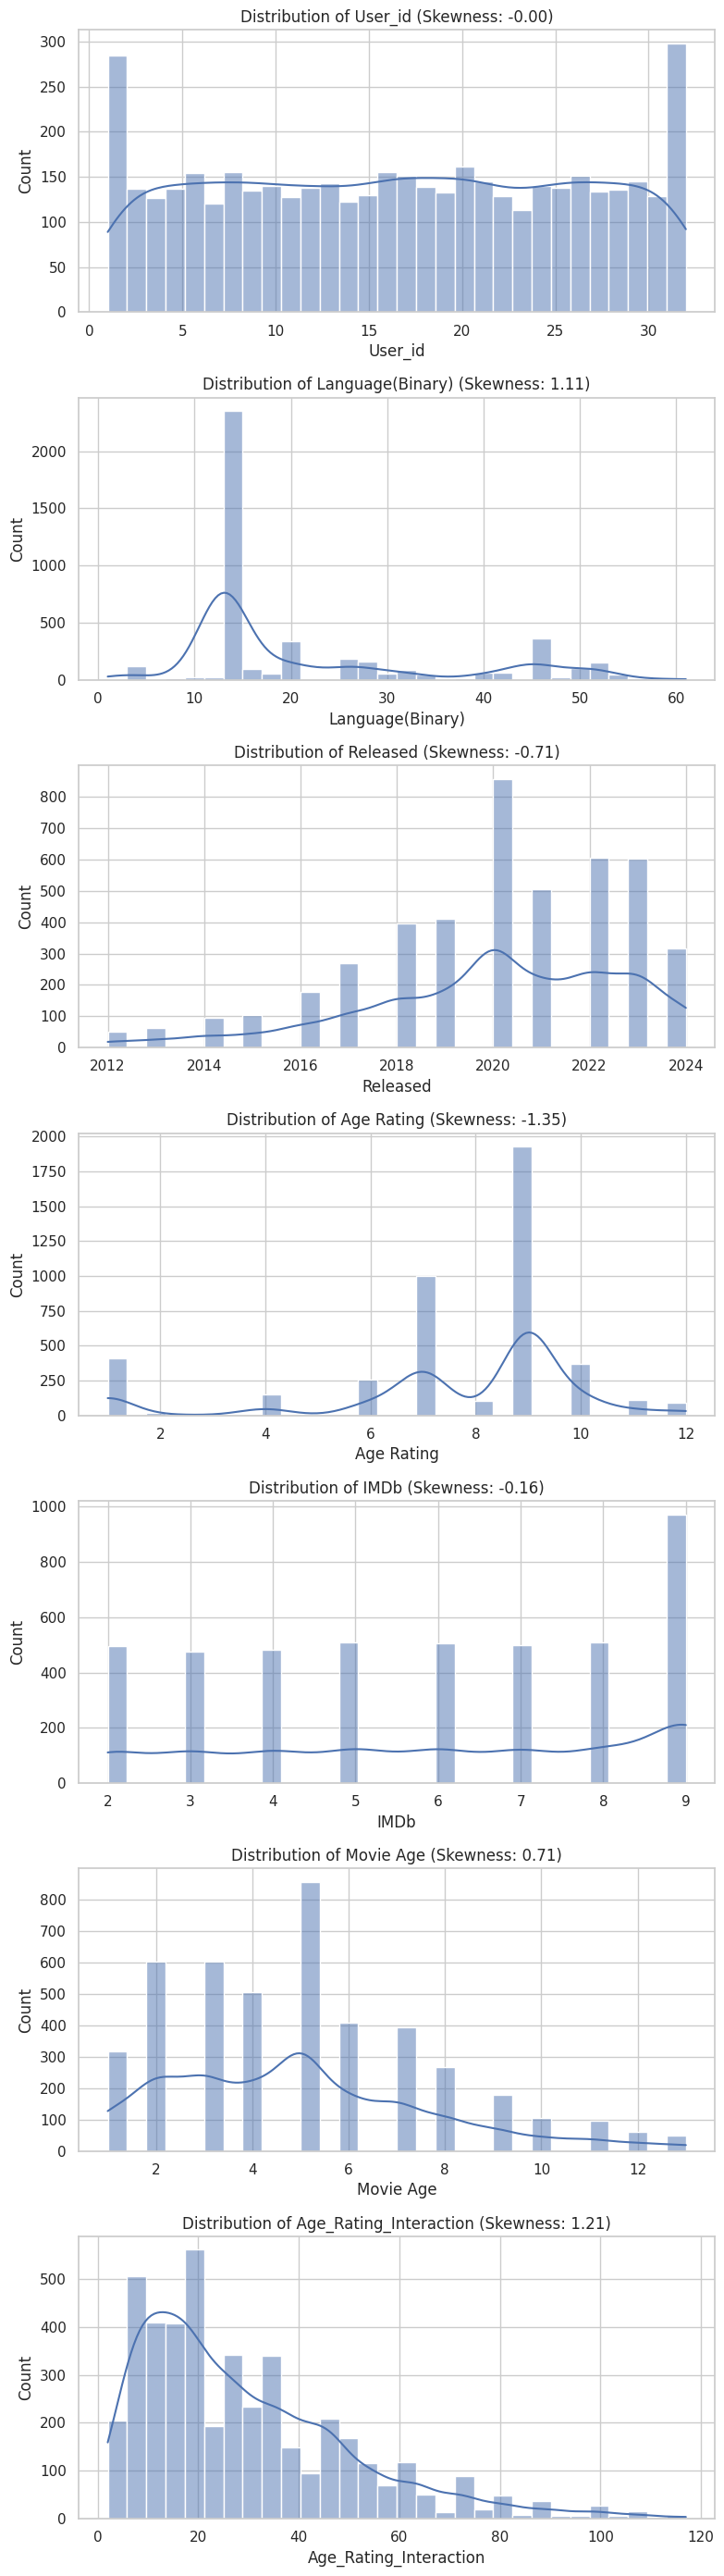

Feature Skewness:
User_id: -0.00 ( Normal )
Language(Binary): 1.11 ( Skewed )
Released: -0.71 ( Skewed )
Age Rating: -1.35 ( Skewed )
IMDb: -0.16 ( Normal )
Movie Age: 0.71 ( Skewed )
Age_Rating_Interaction: 1.21 ( Skewed )


In [ ]:
# Check distributions of features (normal vs. skewed)
# Set style
sns.set(style="whitegrid")

# Select numerical features
df_numeric = df.select_dtypes(include=['number'])

# Create subplots
fig, axes = plt.subplots(nrows=len(df_numeric.columns), ncols=1, figsize=(8, 4 * len(df_numeric.columns)))

# Plot histograms with KDE and calculate skewness
skew_values = {}
for i, feature in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[feature], bins=30, kde=True, ax=axes[i])
    skewness = skew(df_numeric[feature].dropna())  # Remove NaN values before computing skew
    skew_values[feature] = skewness
    axes[i].set_title(f"Distribution of {feature} (Skewness: {skewness:.2f})")

# Adjust layout
plt.tight_layout()
plt.show()

# Print skewness values
print("Feature Skewness:")
for feature, value in skew_values.items():
    print(f"{feature}: {value:.2f} ( {'Normal' if abs(value) < 0.5 else 'Skewed'} )")

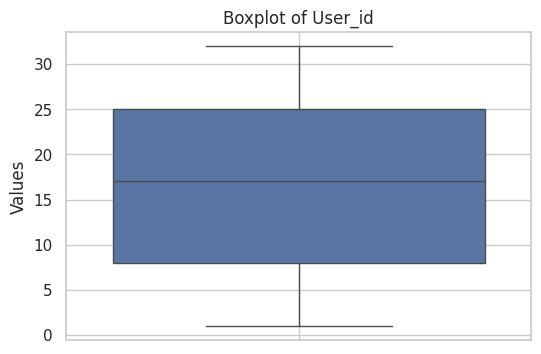

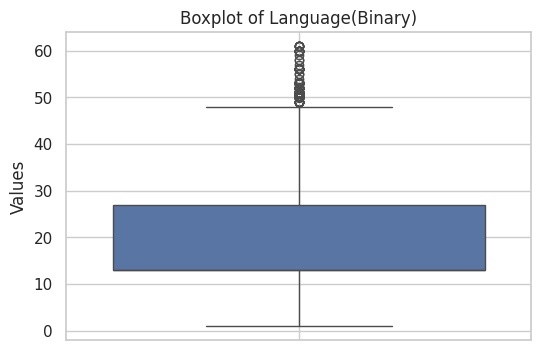

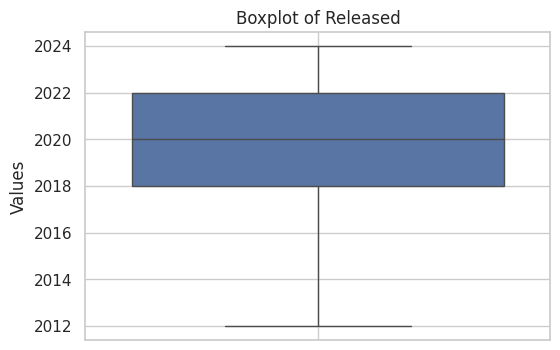

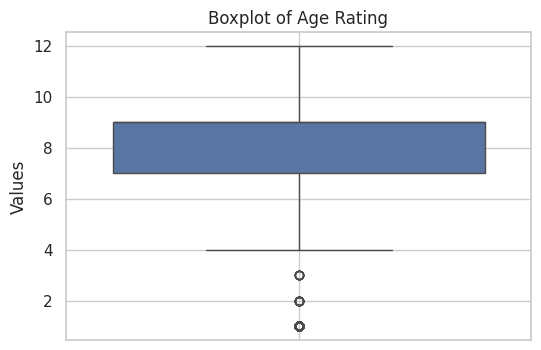

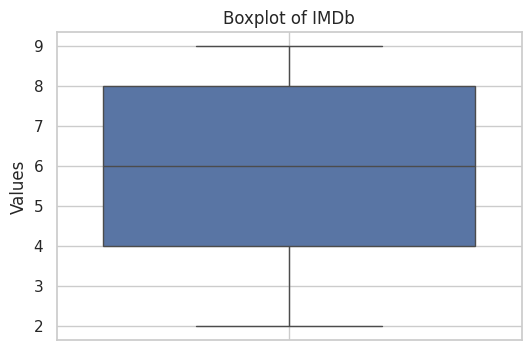

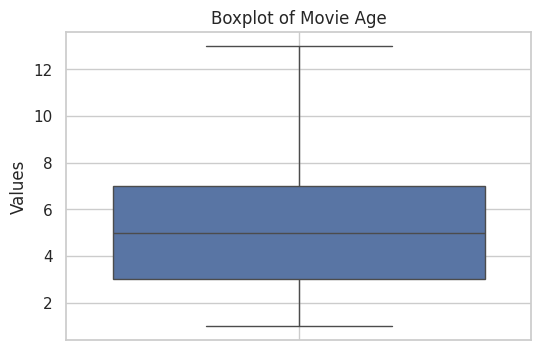

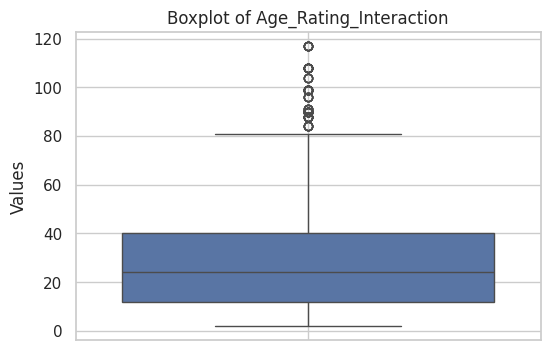

In [ ]:
# ✅ Remove special characters from column names
df.columns = df.columns.str.encode('ascii', 'ignore').str.decode('ascii')

# ✅ Filter only numeric columns to avoid errors
numeric_columns = df.select_dtypes(include=['number']).columns

# ✅ Create individual boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(6, 4))  # New figure for each column
    sns.boxplot(y=df[column])  # Vertical boxplot
    plt.title(f"Boxplot of {column}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()

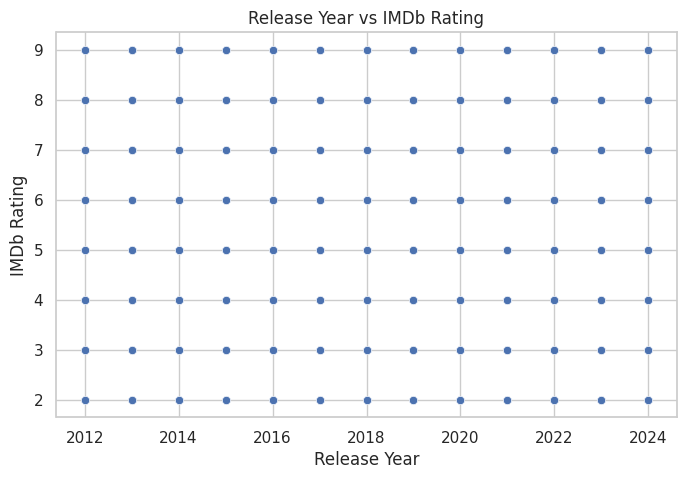

In [ ]:
#Scatter plot: Release Year vs IMDb Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Released'], y = df['IMDb'])
plt.title("Release Year vs IMDb Rating")
plt.xlabel("Release Year")
plt.ylabel("IMDb Rating")
plt.show()

Step 2: Feature Importance Analysis (For All models)

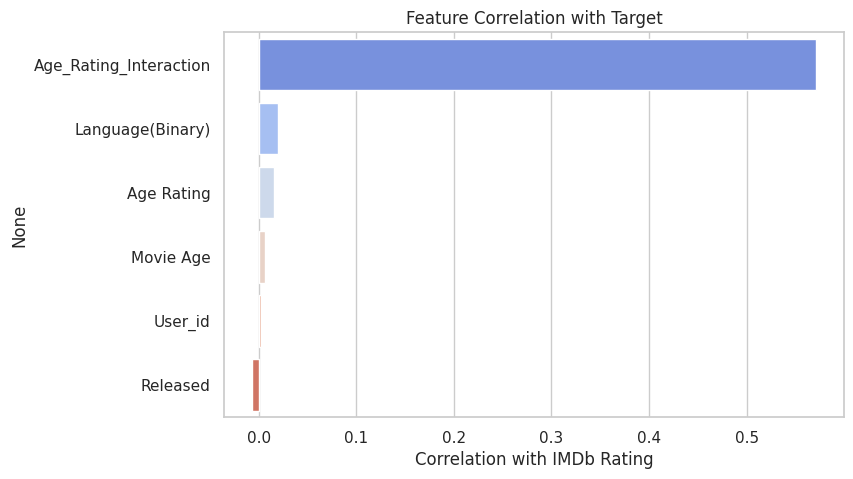

In [ ]:
# Compute correlations with the target variable (change "IMDb" to your actual target)
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlations on the numerical DataFrame
target_corr = numerical_df.corr()["IMDb"].drop("IMDb").sort_values(ascending=False)

# Plot feature correlations with target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_corr.values, y=target_corr.index, hue=target_corr.index, palette="coolwarm", dodge=False, legend=False)  # Set hue and legend=False
plt.xlabel("Correlation with IMDb Rating")
plt.title("Feature Correlation with Target")
plt.show()

Linear Regression

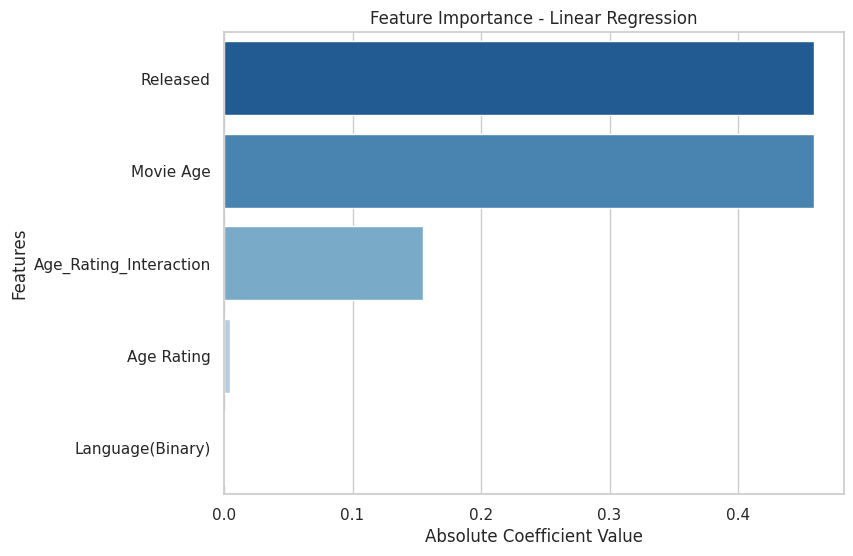

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Get feature importance (absolute coefficient values)
lr_importance = np.abs(lr_model.coef_)

# Create DataFrame for plotting
lr_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': lr_importance}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=lr_importance_df, palette="Blues_r", dodge=False, legend=False)  # Set hue and legend=False
plt.title("Feature Importance - Linear Regression")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.show()

Random forest model

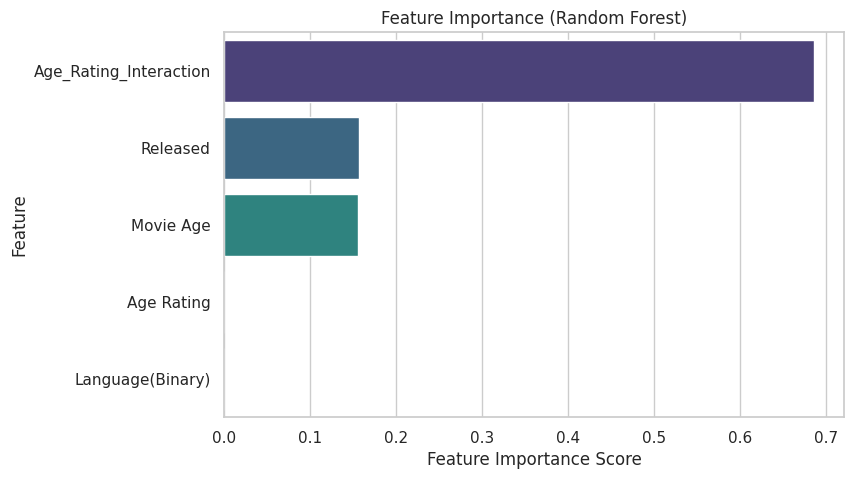

In [ ]:
# Define features and target variable
X = df.drop(columns=["IMDb", "Title Name", "User_id"])  # Drop non-numeric and target
y = df["IMDb"]

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importance = model.feature_importances_

# Convert to DataFrame for better visualization
import pandas as pd
feat_imp_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feat_imp_df, palette="viridis", dodge=False, legend=False)  # Pass feat_imp_df to data
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
#Define Features and Target
X = df[['Released','Age Rating','Language(Binary)', 'Movie Age', 'Age_Rating_Interaction']]
y = df['IMDb']

#Option 2: Impute NaN values with the mean of 'y'
y = y.fillna(y.mean())

#Train a Simple Random Forest Model
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

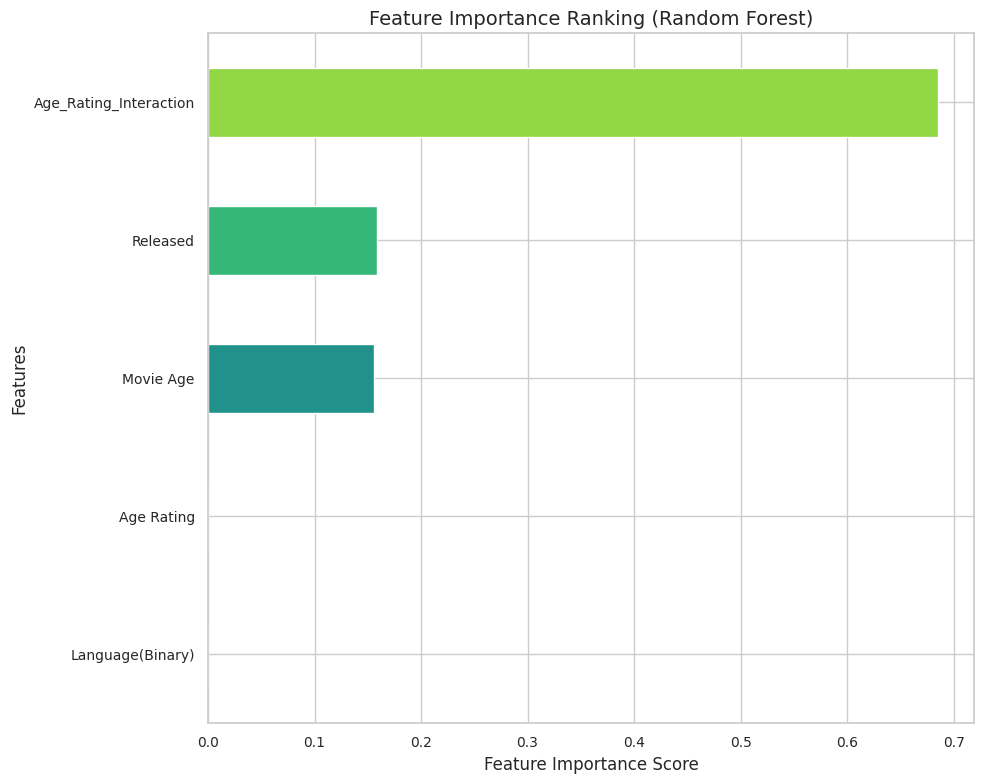

In [ ]:
# Ensure model is trained before extracting feature importance
if hasattr(model, "feature_importances_"):
    feature_importance = pd.Series(model.feature_importances_, index=X.columns)

    # Sort feature importance in descending order for easier readability
    feature_importance = feature_importance.sort_values(ascending=True)  # Changed to ascending for better horizontal plot

    # Set figure size and style
    plt.figure(figsize=(10, 8))
    sns.set_style("whitegrid")  # Improve aesthetics

    # Horizontal bar plot with improved color & spacing
    feature_importance.plot(kind='barh', color=sns.color_palette("viridis", len(feature_importance)))

    # Labels and Title with improved font sizes
    plt.xlabel("Feature Importance Score", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.title("Feature Importance Ranking (Random Forest)", fontsize=14)

    # Adjust tick font sizes for better readability
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
else:
    print("Error: Model does not have feature_importances_. Ensure it's a tree-based model (e.g., Random Forest, XGBoost).")


XGBoost Regressor

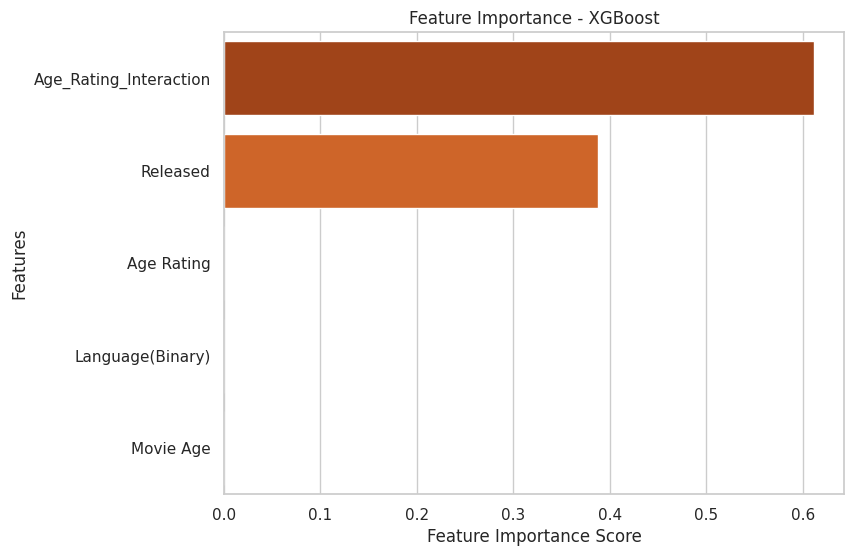

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# Get feature importance from the model
xgb_importance = xgb_model.feature_importances_

# Create DataFrame for plotting
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importance}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=xgb_importance_df, palette="Oranges_r", dodge=False, legend=False)  # Set hue and legend=False
plt.title("Feature Importance - XGBoost")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

Neural Network Model

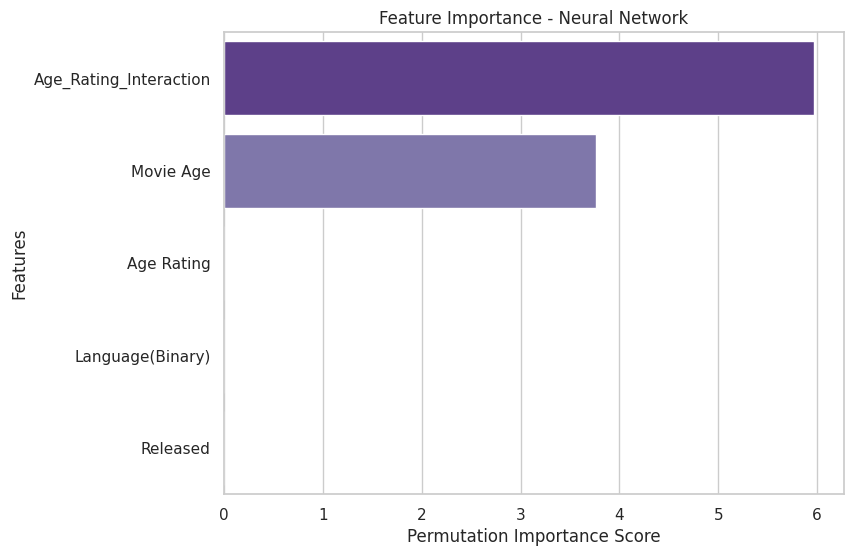

In [ ]:
# Train Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
nn_model.fit(X, y)

# Compute permutation importance
nn_importance = permutation_importance(nn_model, X, y, n_repeats=10, random_state=42)
nn_importance_values = nn_importance.importances_mean

# Create DataFrame for plotting
nn_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': nn_importance_values}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=nn_importance_df, palette="Purples_r", dodge=False, legend=False)  # Set hue and legend=False
plt.title("Feature Importance - Neural Network")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Features")
plt.show()


LightGBM model

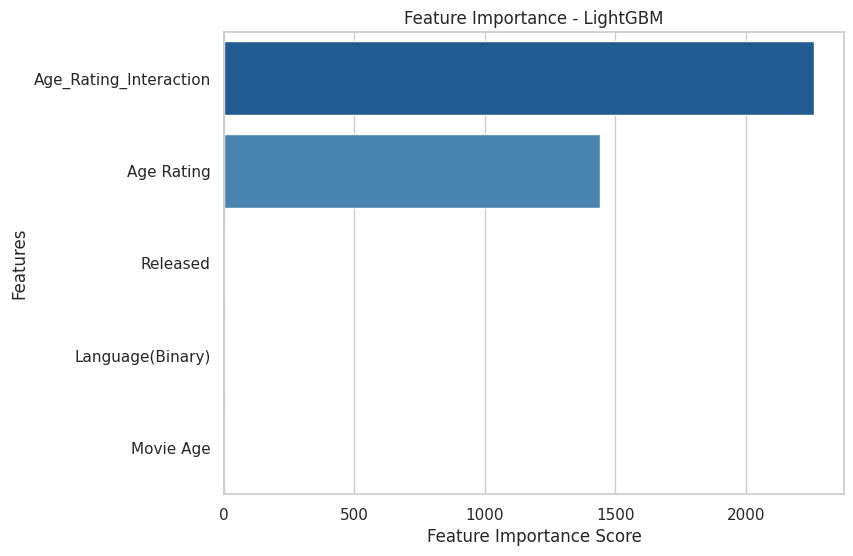

In [ ]:
lgb_importance = lgb.feature_importances_

# ✅ Create DataFrame for plotting
lgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': lgb_importance}).sort_values(by='Importance', ascending=False)

# ✅ Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=lgb_importance_df, palette="Blues_r", dodge=False, legend=False)  # Set hue and legend=False
plt.title("Feature Importance - LightGBM")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

Comparison of Models

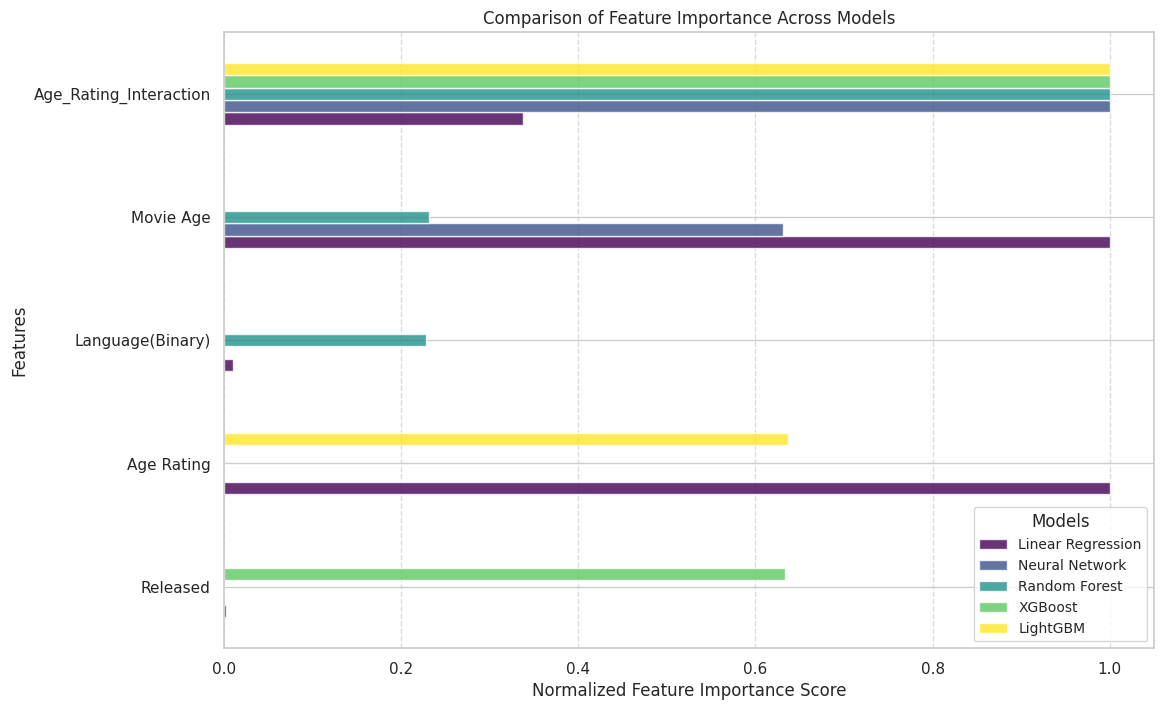

In [ ]:
# ✅ Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Regression": lr_importance,
    "Neural Network": nn_importance_values,
    "Random Forest": feature_importance,
    "XGBoost": xgb_importance,
    "LightGBM": lgb_importance  # ✅ Use lgb_importance instead of lgb_importance_values
}).set_index("Feature")

# ✅ Normalize feature importance (optional, if values have large scale differences)
feature_importance_df = feature_importance_df / feature_importance_df.max()

# ✅ Plot all feature importances together
feature_importance_df.plot(kind="barh", figsize=(12, 8), colormap="viridis", alpha=0.8)

plt.xlabel("Normalized Feature Importance Score")
plt.ylabel("Features")
plt.title("Comparison of Feature Importance Across Models")
plt.legend(title="Models", fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

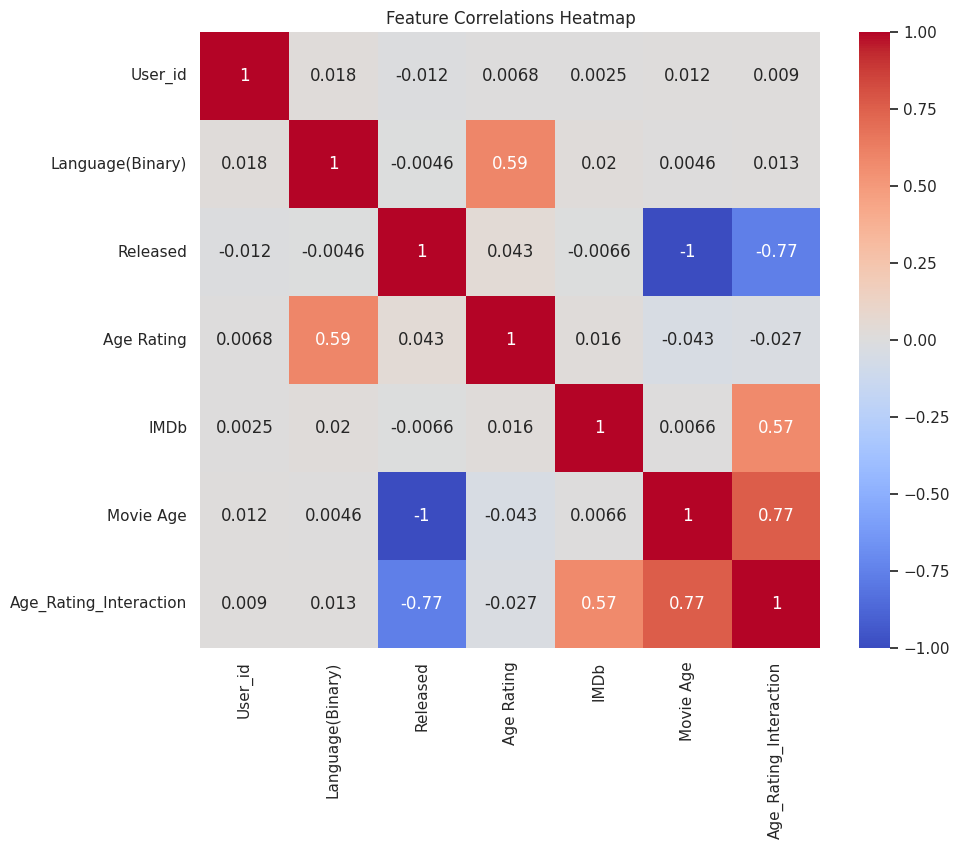

In [ ]:
#Heatmap of Feature Correlations
plt.figure(figsize=(10,8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations Heatmap")
plt.show()

Step 3: Evaluating Model Performance Visually

Plot actual vs. predicted values to check accuracy

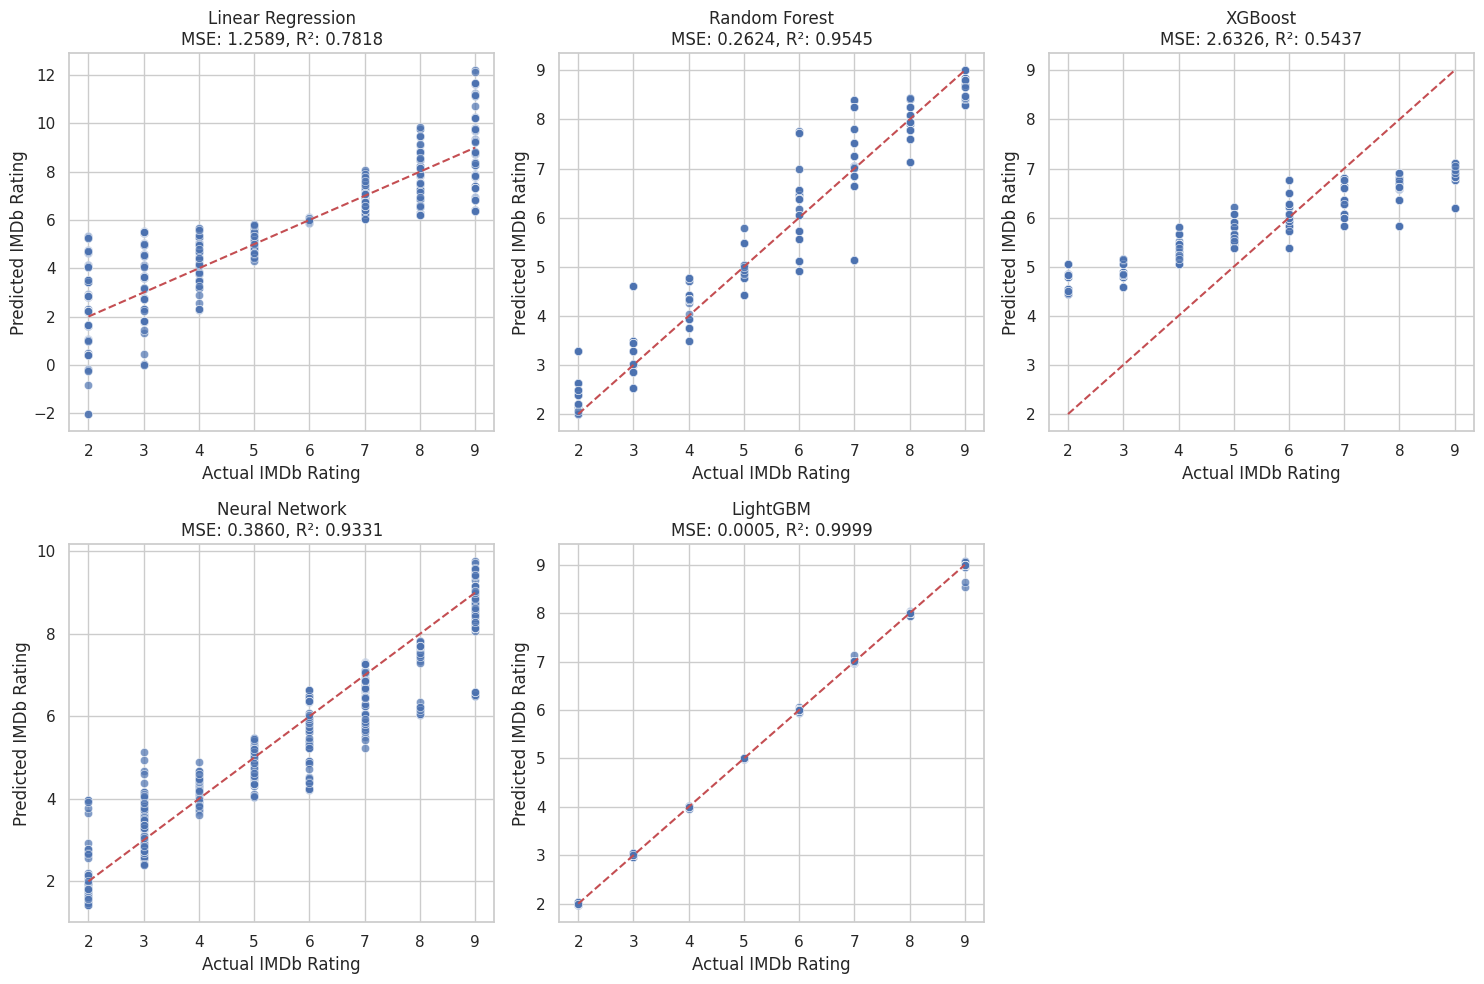

In [ ]:
# ✅ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.01, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42),
    "LightGBM": LGBMRegressor(objective="regression", learning_rate=0.05, max_depth=6, num_leaves=31, n_estimators=500, verbose=-1)
}

# ✅ Train models & make predictions
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # ✅ Scatter plot
    plt.subplot(2, 3, i+1)  # Create subplot grid (2 rows, 3 columns)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)  # Scatter plot
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")  # Perfect fit line
    plt.xlabel("Actual IMDb Rating")
    plt.ylabel("Predicted IMDb Rating")
    plt.title(f"{name}\nMSE: {mse:.4f}, R²: {r2:.4f}")

plt.tight_layout()
plt.show()

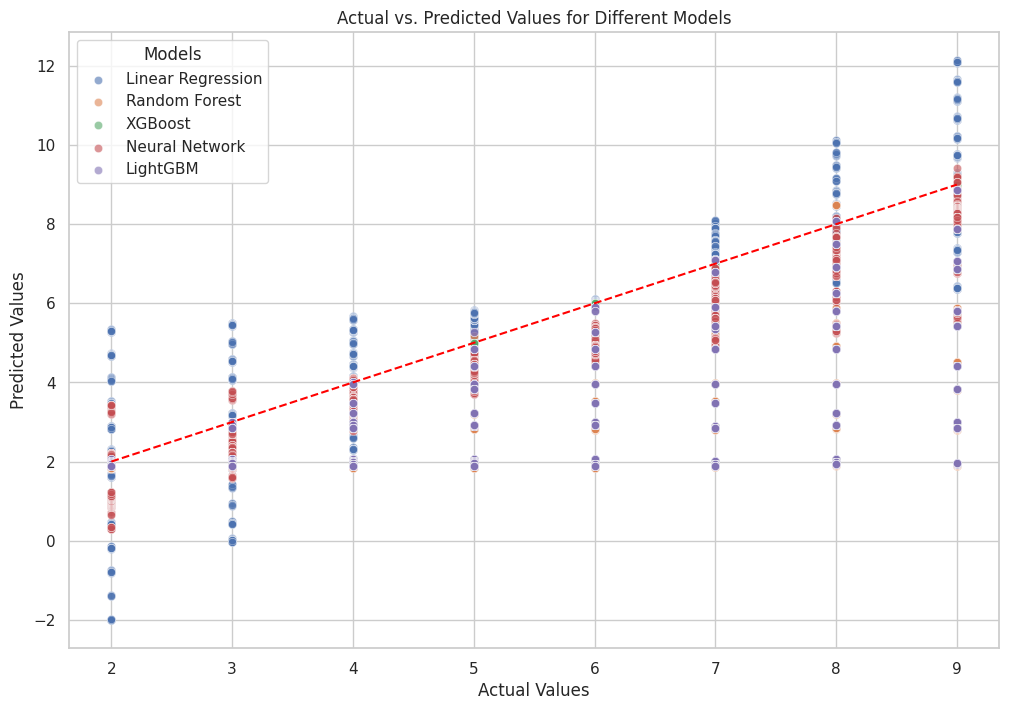

In [ ]:
X_pred = df[X_train.columns].reindex(columns=X_train.columns)

models = {
    "Linear Regression": lr_model.predict(X_pred),
    "Random Forest": model.predict(X_pred[X.columns]),  # Select columns used to train 'model'
    "XGBoost": xgb_model.predict(X_pred[X.columns]),  # Select columns used to train 'xgb_model'
    "Neural Network": nn_model.predict(X_pred[X.columns]),  # Select columns used to train 'nn_model'
    "LightGBM": lgb.predict(X_pred[X.columns])  # Select columns used to train 'lgb'
}

plt.figure(figsize=(12, 8))

# Scatter plot for each model
for name, y_pred in models.items():
    sns.scatterplot(x=y, y=y_pred, label=name, alpha=0.6)

# Perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Different Models")
plt.legend(title="Models")
plt.grid(True)

plt.show()

Use residual plots to detect errors

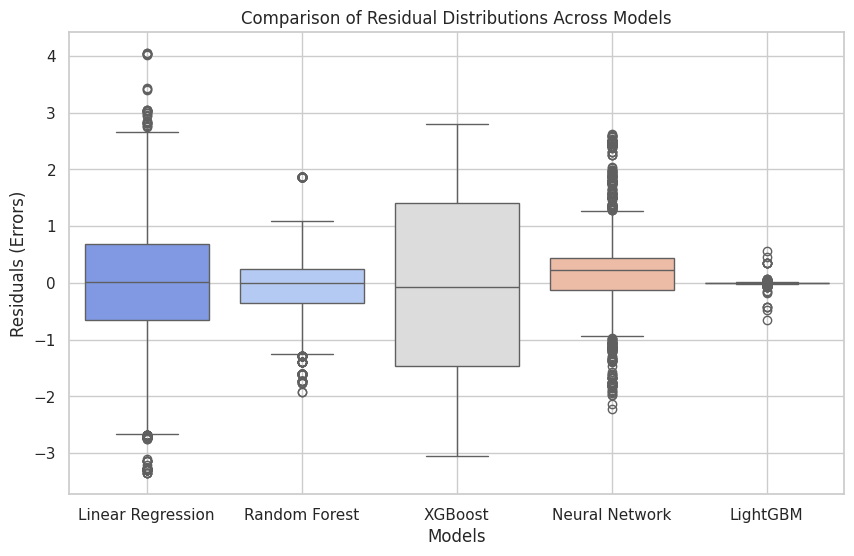

In [ ]:
# ✅ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.01, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42),
    "LightGBM": LGBMRegressor(objective="regression", learning_rate=0.05, max_depth=6, num_leaves=31, n_estimators=500, verbose=-1)
}

# ✅ Train models & get predictions
predictions = {}  # Store predictions for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    # Ensure X has the same columns as X_train and in the same order
    predictions[name] = model.predict(X[X_train.columns])  # Predict using X with X_train's columns

# ✅ Compute residuals and create DataFrame
residuals_df = pd.DataFrame({name: y - predictions[name] for name in models})

# Box plot of residuals
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df, palette="coolwarm")

plt.xlabel("Models")
plt.ylabel("Residuals (Errors)")
plt.title("Comparison of Residual Distributions Across Models")
plt.grid(True)

plt.show()

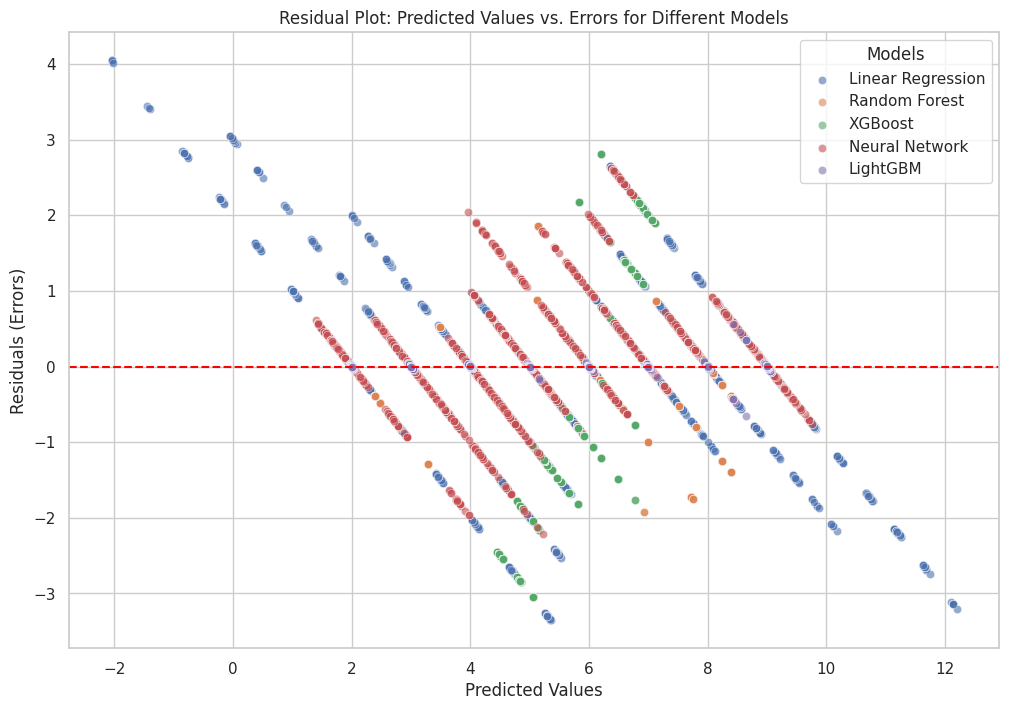

In [ ]:
# ✅ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.01, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42),
    "LightGBM": LGBMRegressor(objective="regression", learning_rate=0.05, max_depth=6, num_leaves=31, n_estimators=500, verbose=-1)
}

# ✅ Train models & get predictions
predictions = {}  # Store predictions for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    # Ensure X has the same columns as X_train and in the same order
    predictions[name] = model.predict(X[X_train.columns])  # Predict using X with X_train's columns


plt.figure(figsize=(12, 8))

# Scatter plot for residuals
for name, y_pred in predictions.items(): #use predictions instead of models
    residuals = y - y_pred
    sns.scatterplot(x=y_pred, y=residuals, label=name, alpha=0.6)

# Reference line at zero residuals
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot: Predicted Values vs. Errors for Different Models")
plt.legend(title="Models")
plt.grid(True)

plt.show()

Compare multiple models visually

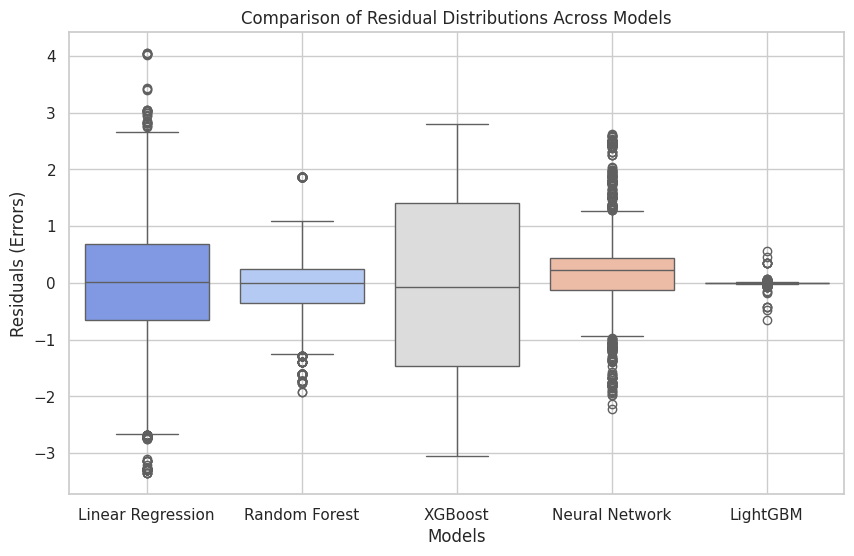

In [ ]:
# Compute residuals for each model
# Change models.items() to predictions.items() to access predicted values
residuals_df = pd.DataFrame({name: y - predictions[name] for name in predictions})

# Box plot of residuals
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df, palette="coolwarm")

plt.xlabel("Models")
plt.ylabel("Residuals (Errors)")
plt.title("Comparison of Residual Distributions Across Models")
plt.grid(True)

plt.show()

Step 4: Residual Analysis

Plot residuals (errors) against predicted values

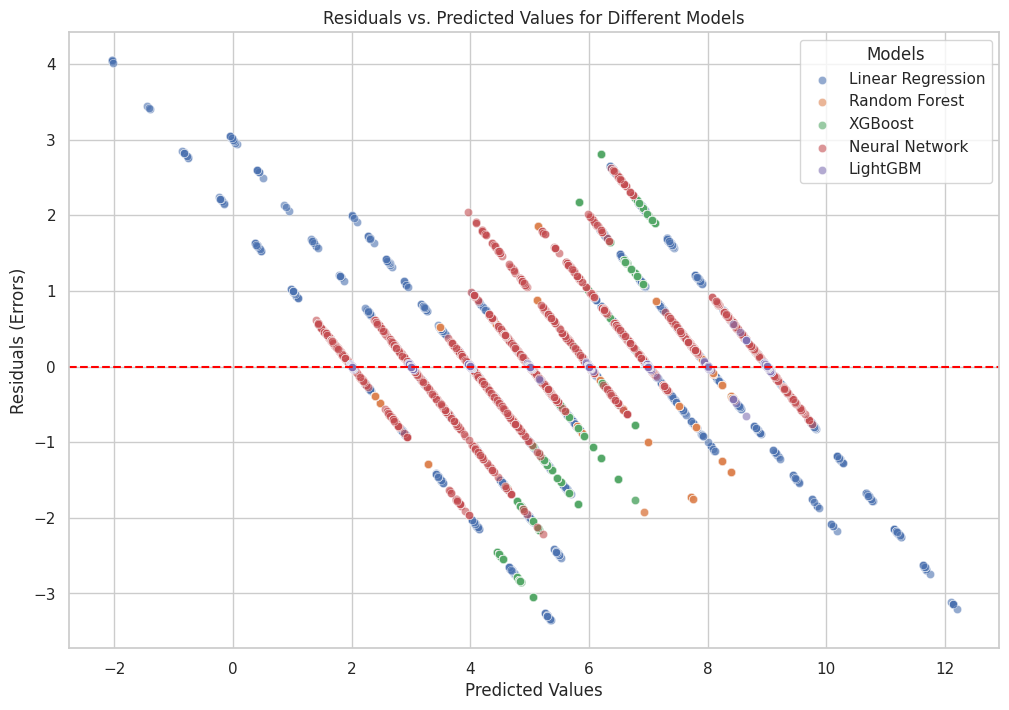

In [ ]:
plt.figure(figsize=(12, 8))

# Plot residuals for each model
for name, model in models.items():
    # Get predictions using the model with the correct columns
    # Reindex X to match the columns of X_train
    X_pred = X[X_train.columns].reindex(columns=X_train.columns)
    y_pred = model.predict(X_pred)

    residuals = y - y_pred  # Calculate residuals
    sns.scatterplot(x=y_pred, y=residuals, label=name, alpha=0.6)

# Add reference line at zero
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residuals vs. Predicted Values for Different Models")
plt.legend(title="Models")
plt.grid(True)

plt.show()